# **Лабораторная работа № 5.**
### по курсу «Нейроинформатика»
## **Тема: Сети с обратными связями**



> Студент: Овечкин В.А.

> Группа: М8О-408Б-18

> Преподаватель: Аносова Н.П.

> Оценка:

## **Цель работы**: 
Исследование свойств сетей Хопфилда, Хэмминга и Элмана, алгоритмов обучения, а также применение сетей в задачах распознавания статических и динамических
образов.


## **Постановка задачи:**
1. Использовать сеть Элмана для распознавания динамических образов. Проверить качество
распознавания.
2. Использовать сеть Хопфилда для распознавания статических образов. Проверить качество
распознавания.
3. Использовать сеть Хэмминга для распознавания статических образов. Проверить качество
распознавания.

## **Вариант** :
Для этапа 1


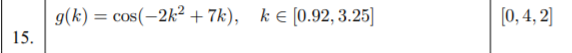


Для этапа 2


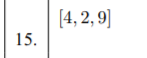

###Теория
*Сеть Элмана*: один из видов рекуррентной сети, которая получается из многослойного персептрона введением обратных связей, но связи идут не от выхода сети, а от выходов внутренних нейронов. Их главная особенность- запоминание последовательностей. Сеть обладает скрытым слоем и производит расчеты выходного слоя для t-го входного вектора таким образом:

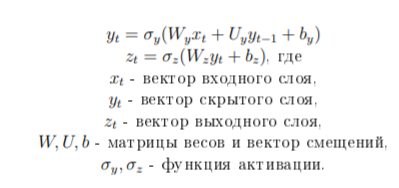

Схема представима в виде:

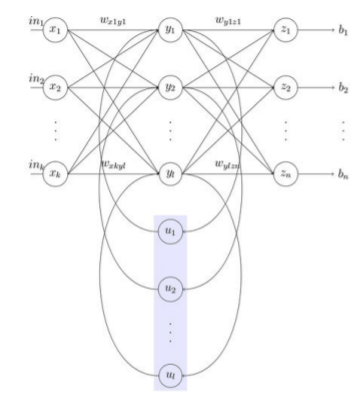


*Сеть Хопфилда*: Полносвязная нейросеть с симметричной матрицей связей.  В процессе работы динамика таких сетей сходится к одному из положений равновесия. Эти положения определяются в процессе обучения заранее, они являются локальными минимумами функционала, который называется энергией сети(простейший случай: локальные мнимумы отрицательно определенная квадратичная форма на n-мерном кубе). Такая сеть может испольщоваться в качестве автоассоциативной памяти, как фильтр или для решения задач оптимизации. В отличие от многих нейросетей, работающих до получения ответа через определенное исло тактов, такие сети работают до достижения равновесия, когда следующее состояние равно предыдущему. Начальное состояние - входной обра, а при равновесии имеем выходной образ. Ее вариация - сеть Хэмминга. 

Каждый нейрон слоя из n нейронов связан обратными связями с остальными n-1 нейронами данного слоя. Сеть может корректировать искаженные образцы. 

Веса данного слоя погут быть получены так:

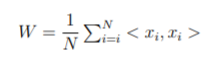

А схема представима в виде:

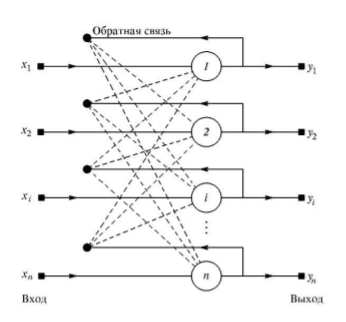


*Сеть Хэмминга*: вид нейросети, используемый для классификации бинарных векторов, основной критерий которой - расстояние Хэмминга. Является развитием сети Хопфилда.
Сеть можно использовать для соотношения бинарного вектора х с одним из эталонных образов(для каждого класса свой образ), или решения о том, что вектор не соответствует ни одному из эталонов. В отличие от сети Хопфилда выдаёт не образец, а его номер. Состоит из полносвязного слоя со слоем сети Хопфилда и представляется в виде:

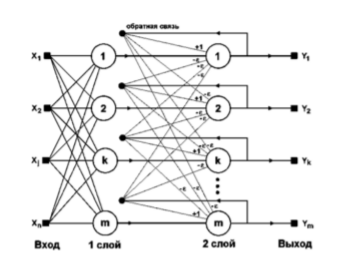




# Листинг кода

In [ ]:
!pip install neupy
!pip install neurolab

import neurolab as nl
import numpy as np
import numpy.matlib

from neupy import algorithms
from scipy.spatial import distance
import pylab as pl

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

     |████████████████████████████████| 226 kB 6.0 MB/s 
     |████████████████████████████████| 92.7 MB 27 kB/s 
     |████████████████████████████████| 50 kB 5.8 MB/s 
     |████████████████████████████████| 3.2 MB 36.8 MB/s 
     |████████████████████████████████| 367 kB 55.0 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.7.0
    Uninstalling tensorflow-2.7.0:
      Successfully uninstalled tensorflow-2.7.0
  Attempting uninstall: progressbar2
    Found existing installation: progressbar2 3.38.0
    Uninstalling progressbar2-3.38.0:
      Successfully uninstalled progres

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [ ]:
k1 = np.linspace(0, 1, int(1 / 0.025), endpoint=True)
p1 = np.sin(4 * np.pi * k1)
t1 = np.ones(len(k1)) * (-1)

a2, b2 = 0.95, 3.25
k2 = np.linspace(a2, b2, int((b2 - a2) / 0.025), endpoint=True)
p2 = np.cos(-2 * k2 * k2 + 7 * k2 )
t2 = np.ones(len(k2))

R = [0, 4, 2]

In [ ]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])
P = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

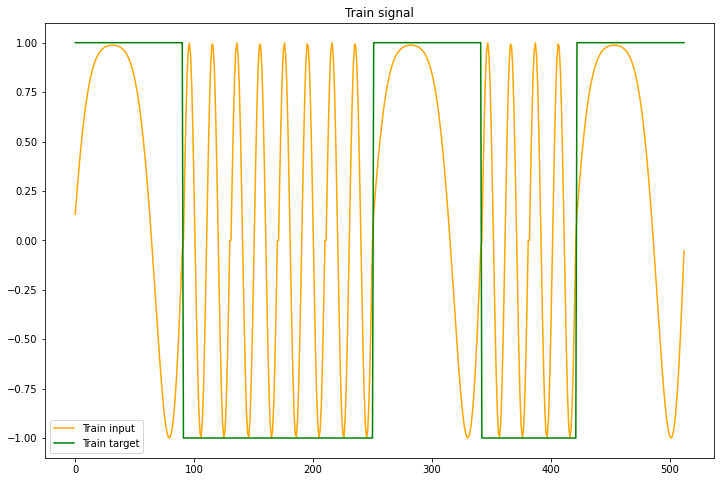

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(P.reshape(P.shape[0]), color='orange')
plt.plot(T.reshape(T.shape[0]), color='green')
plt.legend(['Train input', 'Train target'])
plt.title("Train signal")
plt.show()

Создаем сеть с 2 слоями. Число нейронов скрытого слоя - $8$. Для скрытого и выходного слоев используем tansig в качестве активационной функции. Посмотрим на функцию ошибки.

In [ ]:
net = nl.net.newelm([[-10, 10]], [8, 1], [nl.trans.TanSig(), nl.trans.TanSig()])

net.layers[0].np['w'][:] = 1 # weight
net.layers[0].np['b'][:] = 0 # bias
net.init()

In [ ]:
error = net.train(P, T, epochs = 250, show = 10, goal = 0.00001)

Epoch: 10; Error: 1.4141482058332204;
Epoch: 20; Error: 1.2407553454537712;
Epoch: 30; Error: 1.2266077405329259;
Epoch: 40; Error: 1.010660212218595;
Epoch: 50; Error: 0.9720009268457567;
Epoch: 60; Error: 0.9353888908360174;
Epoch: 70; Error: 0.9310066787632322;
Epoch: 80; Error: 0.9300879809272621;
Epoch: 90; Error: 0.928811788502644;
Epoch: 100; Error: 0.9280412557928444;
Epoch: 110; Error: 0.9268672184227267;
Epoch: 120; Error: 0.9594748104908364;
Epoch: 130; Error: 0.9388408382821773;
Epoch: 140; Error: 0.8584032230127773;
Epoch: 150; Error: 0.759852483659748;
Epoch: 160; Error: 0.6666533521316729;
Epoch: 170; Error: 0.5377945062863579;
Epoch: 180; Error: 0.9617759133415463;
Epoch: 190; Error: 0.9702269294334392;
Epoch: 200; Error: 0.961732335727507;
Epoch: 210; Error: 0.9496236456022554;
Epoch: 220; Error: 0.7454381541328389;
Epoch: 230; Error: 0.7142004045215969;
Epoch: 240; Error: 0.6669787887813045;
Epoch: 250; Error: 0.6465504644043265;
The maximum number of train epochs is 

In [ ]:
output = net.sim(P)

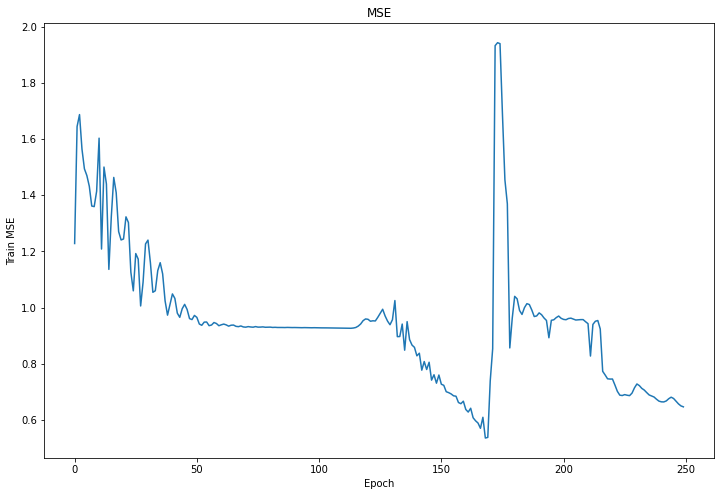

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(error)
plt.xlabel('Epoch')
plt.ylabel('Train MSE')
plt.title("MSE")
plt.show()

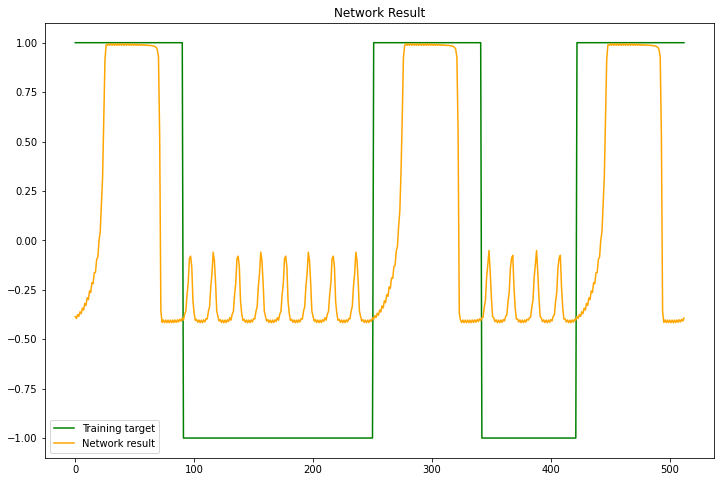

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(T.reshape(T.shape[0]), color='green')
plt.plot(output.reshape(output.shape[0]), color = 'orange')
plt.legend(['Training target', 'Network result'])
plt.title("Network Result")
plt.show()

In [ ]:
output[output >= 0] = 1.0
output[output < 0] = -1.0

MSE = mean_squared_error(T, output)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 0.9200779727095516
RMSE = 0.959206949885973


In [ ]:
k1 = np.linspace(0, 1, int(1 / 0.025), endpoint=True)
p1 = np.sin(4 * np.pi * k1)
t1 = np.ones(len(k1)) * (-1)

a2, b2 = 0.24, 2.7
k2 = np.linspace(a2, b2, int((b2 - a2) / 0.025), endpoint=True)
p2 = np.cos(-3 * k2 * k2 + 5 * k2 + 10)
t2 = np.ones(len(k2))

R = [2, 8, 4]

In [ ]:
p2 = p2.reshape(1, p2.shape[0])
t2 = t2.reshape(1, t2.shape[0])

P2 = np.concatenate((numpy.matlib.repmat(p1, 1, R[0]), p2,
                    numpy.matlib.repmat(p1, 1, R[1]), p2,
                    numpy.matlib.repmat(p1, 1, R[2]), p2), axis=1).reshape(-1, 1)

T2 = np.concatenate((numpy.matlib.repmat(t1, 1, R[0]), t2,
                    numpy.matlib.repmat(t1, 1, R[1]), t2,
                    numpy.matlib.repmat(t1, 1, R[2]), t2), axis=1).reshape(-1, 1)

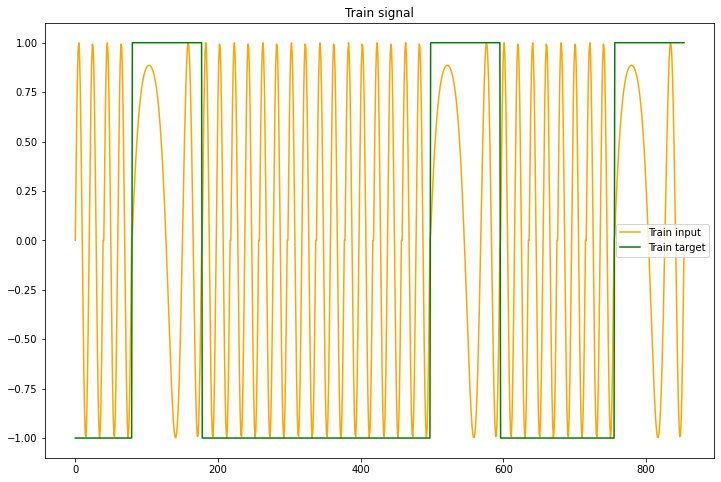

In [ ]:
plt.figure(figsize = (12, 8))
plt.plot(P2.reshape(P2.shape[0]), color='orange')
plt.plot(T2.reshape(T2.shape[0]), color='green')
plt.legend(['Train input', 'Train target'])
plt.title("Train signal")
plt.show()

In [ ]:
output2 = net.sim(P2)

Сравним предсказание с тренировочными данными

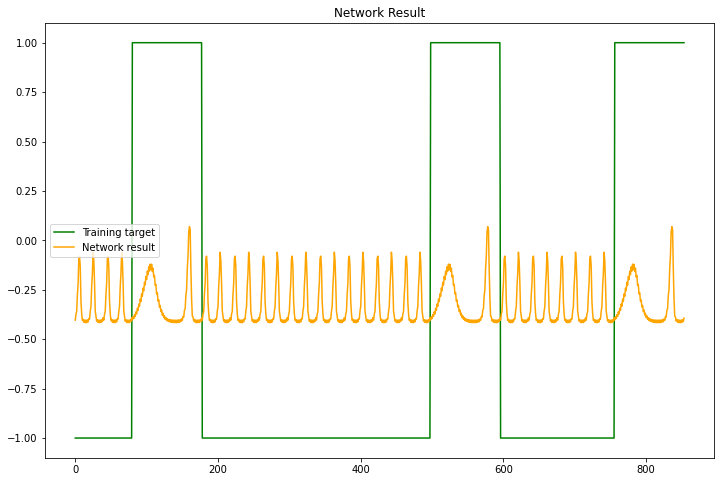

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(T2.reshape(T2.shape[0]), color='green')
plt.plot(output2.reshape(output2.shape[0]), color = 'orange')
plt.legend(['Training target', 'Network result'])
plt.title("Network Result")
plt.show()

In [ ]:
output2[output2 >= 0] = 1.0
output2[output2 < 0] = -1.0

MSE = mean_squared_error(T2, output2)
print('MSE = {}'.format(MSE))
print('RMSE = {}'.format(np.sqrt(MSE)))

MSE = 1.334894613583138
RMSE = 1.155376394766285


In [ ]:
four = np.matrix([
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
                0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

two = np.matrix([
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
                1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

nine = np.matrix([
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
                0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
def getPicture(picture):
    for i in picture.tolist():
        print(' '.join(' #'[val] for val in i))

In [ ]:
def noise(picture, percentage):
    limit = picture.shape[1]
    tmp = picture.T
    
    for i in range(percentage):
        position = np.random.randint(1, limit, 1)[0]
        tmp[position] *= 0
    res = tmp.T
    return res

In [ ]:
data = np.concatenate([four, two, nine], axis = 0)

hopfieldNet = algorithms.DiscreteHopfieldNetwork(mode = 'async', n_times = 600)
hopfieldNet.train(data)

In [ ]:
getPicture(four.reshape(12,10))

  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  


In [ ]:
res = hopfieldNet.predict(four)

In [ ]:
getPicture(res.reshape(12,10))

  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  


In [ ]:
noise1 = noise(two, 20)
getPicture(noise1.reshape(12, 10))

# # # # # # # #    
  # # # # # # #    
            # #    
              #    
                   
# # # #   # # #    
#   # # #   # #    
# #                
#                  
# #                
# # # #   # # #    
# # # # # # # #    


In [ ]:
res = hopfieldNet.predict(noise1)
getPicture(res.reshape(12, 10))

# # # # # # # #    
# # # # # # # #    
            # #    
            # #    
            # #    
# # # # # # # #    
# # # # # # # #    
# #                
# #                
# #                
# # # # # # # #    
# # # # # # # #    


In [ ]:
noise3 = noise(nine, 30)
getPicture(noise3.reshape(12, 10))

        # # #      
          # # # # #
        # #     # #
        # #     #  
        # #     # #
        #       # #
        # # # # # #
        # # #   # #
                #  
                  #
            # # # #
        # #     # #


In [ ]:
res = hopfieldNet.predict(noise3)
getPicture(res.reshape(12, 10))

        # # # # # #
        # # # # # #
        # #     # #
        # #     # #
        # #     # #
        # #     # #
        # # # # # #
        # # # # # #
                # #
                # #
        # # # # # #
        # # # # # #


еще раз

In [ ]:
noise3 = noise(four, 20)
getPicture(noise3.reshape(12, 10))

  #           # #  
              # #  
  # #         # #  
  #           # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
                #  
              # #  
              # #  


In [ ]:
res = hopfieldNet.predict(noise3)
getPicture(res.reshape(12, 10))

  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  


task 3

In [ ]:
zero = np.array([
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, 1, 1, 1, -1, -1, 1, 1, 1, -1,
               -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
               -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
               -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])
       
one = np.array([
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1,
                -1, -1, -1, 1, 1, 1, 1, -1, -1, -1])
       
two = np.array([
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1,
                1, 1, 1, 1, 1, 1, 1, 1, -1, -1])
    
three = np.array([
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, 1, 1, 1, 1, -1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, 1, 1, 1, 1, 1, 1, -1, -1])
       
four = np.array([
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, -1, -1, -1, -1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, 1, 1, 1, 1, 1, 1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1,
                -1, -1, -1, -1, -1, -1, -1, 1, 1, -1])

six = np.array([
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1, 1,
                1, -1, -1, -1, -1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, -1, -1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1,
                1, 1, 1, 1, 1, 1, -1, -1, -1, -1])
       
nine = np.array([
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, -1, -1, -1, -1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1,
                -1, -1, -1, -1, 1, 1, 1, 1, 1, 1])

In [ ]:
Q = 7
patterns = np.array([zero, one, two, three, four, six, nine])
nums = [0, 1, 2, 3, 4, 6, 9]
epsilon = 1 / (Q - 3)

In [ ]:
shape = 10 * 12

In [ ]:
IW = np.array([zero.T, one.T, two.T, three.T, four.T, six.T, nine.T])
b = shape * np.ones((Q, 1))

a = np.zeros((Q, Q))
for i in range(Q):
    a[i] = IW[i] @ patterns[i] + b[i]
    
LW = np.eye(Q)
LW[LW == 0.0] = -epsilon

In [ ]:
network = nl.net.newhop(a, max_init=600)
network.layers[0].np['w'][:] = LW
network.layers[0].np['b'][:] = 0

In [ ]:
A = IW @ nine + b

In [ ]:
result = network.sim(A)

In [ ]:
answerClass = np.argmax(result[0])
print('Result class: {}'.format(nums[answerClass]))

number = patterns[answerClass]
number[number == -1] = 0
getPicture(number.reshape(12, 10))

Result class: 9
        # # # # # #
        # # # # # #
        # #     # #
        # #     # #
        # #     # #
        # #     # #
        # # # # # #
        # # # # # #
                # #
                # #
        # # # # # #
        # # # # # #


In [ ]:
noise11 = np.asarray(noise1)[0]
noise11[noise11 == 0] = -1
A = IW @ noise11 + b
res = network.sim(A)

answerClass = np.argmax(res[0])
print('Result class: {}'.format(nums[answerClass]))

number = patterns[answerClass]
number[number == -1] = 0
getPicture(number.reshape(12, 10))

Result class: 2
# # # # # # # #    
# # # # # # # #    
            # #    
            # #    
            # #    
# # # # # # # #    
# # # # # # # #    
# #                
# #                
# #                
# # # # # # # #    
# # # # # # # #    


In [ ]:
noise33 = np.asarray(noise3)[0]
noise33[noise33 == 0] = -1
A = IW @ noise33 + b
res = network.sim(A)

answerClass = np.argmax(res[0])
print('Result class: {}'.format(nums[answerClass]))

number = patterns[answerClass]
number[number == -1] = 0
getPicture(number.reshape(12, 10))

Result class: 4
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # #         # #  
  # # # # # # # #  
  # # # # # # # #  
              # #  
              # #  
              # #  
              # #  
              # #  


#Вывод:
Я познакомился с рекуррентными нейросетями и поработал с сетями Хопфилда, Хэмминга и Элмана.
Практически применил данные сетей в задачах распознавания статических и динамических образов.